In [1]:
from nilearn import surface

/Users/gdehol/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import cortex

In [3]:
import numpy as np
import scipy.stats as ss

In [4]:
results_ = []
for subject, session in [('bm', 'odc'),
                         ('de', 'odc1'),
                         ('eo', 'odc'),
                         ('ms', 'odc2'),
#                          ('ns', 'odc'),
                         ('tk', 'odc2'),
                         ('tk', 'odc3'),                         
                         ('tr', 'odc')]:
    
    left, right = cortex.db.get_surf(f'odc.{subject}', 'fiducial')
    
    masks = cortex.utils.get_roi_verts(f'odc.{subject}')
    
    for hemi in ['lh', 'rh']:
        
        if not ((subject == 'bm') & (hemi == 'lh')):
            zmap = surface.load_surf_data(f'/data/odc/derivatives/sampled_giis.bak/sub-{subject}/ses-{session}/func/sub-{subject}_ses-{session}_left_over_right_desc-abszmap-depth-all_hemi-{hemi}.gii')

            for mask in masks:

                if mask[-1] == hemi[0]:
                    m = masks[mask]

                    if hemi == 'rh':
                        m -= len(left[0])

                    z_values = zmap[m]

                    z_values = z_values[z_values > 0.25]
                    results_.append({'subject':subject,
                                    'session':session,
                                    'Mask':mask,
                                    'hemi':hemi,
                                     'mean z-value':z_values.mean(),
                                     'z-values larger than 1.96':(z_values > ss.norm.ppf(0.975)).mean(),                               
                                     'z-values larger than 2.3':(z_values > 2.3).mean()})
#                                     'z-value':z_values})


/Users/gdehol/git/pycortex/cortex/svgoverlay.py:465: UserWarning: Requested layer in svg file (Freesurfer V1) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%self.name)
/Users/gdehol/git/pycortex/cortex/svgoverlay.py:465: UserWarning: Requested layer in svg file (Freesurfer V2) contains no splines
  warnings.warn("Requested layer in svg file (%s) contains no splines"%self.name)


In [5]:
import pandas as pd

In [6]:
results = pd.DataFrame(results_)

In [7]:
results = results.pivot_table(index=['subject', 'session'], columns=['Mask'], values='z-values larger than 1.96')

In [8]:
results['V2l'] = results.loc[:, ['V2dl', 'V2vl']].mean(1, skipna=True)
results['V2r'] = results.loc[:, ['V2dr', 'V2vr']].mean(1, skipna=True)

In [9]:
import seaborn as sns

In [10]:
sns.set_context('poster')

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
sns.set(font='Helvetica', style='white', context='poster')

In [14]:
   from matplotlib.backends.backend_pdf import PdfPages


In [16]:
https://www.physiology.org/doi/full/10.1152/jn.00088.2015

SyntaxError: invalid syntax (<ipython-input-16-e824dfb853dc>, line 1)

In [27]:
ss.ttest_rel(results['V1l'].iloc[1:], results['V2l'].iloc[1:])

Ttest_relResult(statistic=2.0053088439589106, pvalue=0.10125081069671858)

In [22]:
ss.ttest_rel(results['V1r'].iloc[:], results['V2r'].iloc[:])

Ttest_relResult(statistic=1.5505141127172017, pvalue=0.17199717105153423)

In [24]:
ss.wilcoxon(results['V1l'].iloc[1:], results['V2l'].iloc[1:])

/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=2.0, pvalue=0.07473549830588248)

In [25]:
ss.wilcoxon(results['V1r'].iloc[1:], results['V2r'].iloc[1:])

WilcoxonResult(statistic=6.0, pvalue=0.3454475304692257)

/Users/gdehol/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


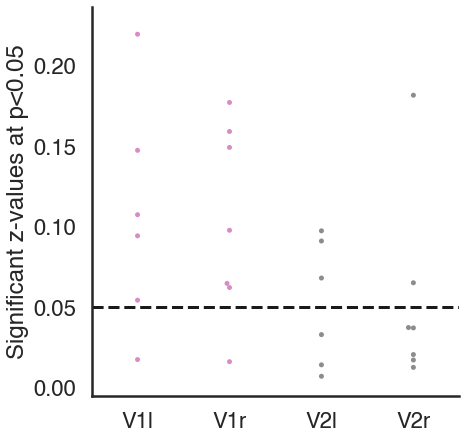

In [23]:
fac = sns.factorplot('Mask', 'Significant z-values at p<0.05', data=results.melt(value_name='Significant z-values at p<0.05'), 
          kind='swarm', 
           order=['V1l', 'V1r', 'V2l', 'V2r'], 
           palette=np.repeat(sns.color_palette()[6:], 2, axis=0), aspect=1.,
           ci=67,
           size=7.)


fac.set_xlabels('')

sns.despine()

plt.axhline(0.05, c='k', ls='--')
plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/known_patterns/V1-V2_barplot.svg')

/Users/gdehol/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


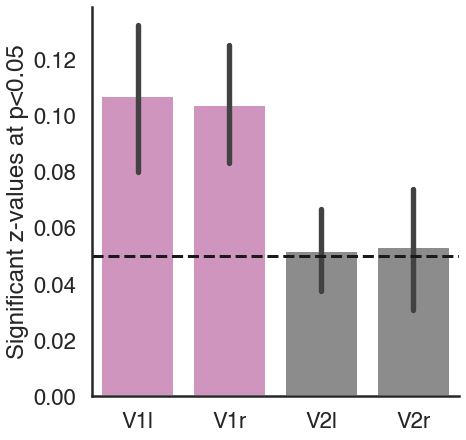

In [17]:
fac = sns.factorplot('Mask', 'Significant z-values at p<0.05', data=results.melt(value_name='Significant z-values at p<0.05'), 
          kind='bar', 
           order=['V1l', 'V1r', 'V2l', 'V2r'], 
           palette=np.repeat(sns.color_palette()[6:], 2, axis=0), aspect=1.,
           ci=67,
           size=7.)


fac.set_xlabels('')

sns.despine()

plt.axhline(0.05, c='k', ls='--')
plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/known_patterns/V1-V2_barplot.svg')

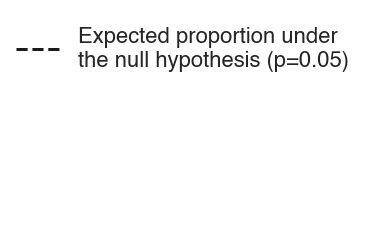

In [46]:
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], ls='--', lw=3., c='k')]

leg = plt.legend(custom_lines, ['Expected proportion under\nthe null hypothesis (p=0.05)'])
leg.get_frame().set_linewidth(0.0)

plt.axis('off')
plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/known_patterns/V1-V2_barplot_legend.svg', 
            transparent=True)

In [24]:
results[['V1l', 'V1r', 'V2l', 'V2r']].std()

Mask
V1l    0.071144
V1r    0.059897
V2l    0.039186
V2r    0.059455
dtype: float64

In [110]:
sns.factorplot('Mask', 'Significant z-values at p<0.05', data=results.melt(value_name='Mean z-value'), 
              kind='bar', 
               order=['V1l', 'V1r', 'V2l', 'V2r'], 
               palette=np.repeat(sns.color_palette()[2:], 2, axis=0), aspect=2.,
               ci=95,
               size=10)

plt.axhline(0.05, c='k', ls='--')

Mask                  V1l       V1r      V2dl      V2dr      V2vl      V2vr  \
subject session                                                               
bm      odc           NaN  0.177281       NaN  0.037091       NaN       NaN   
de      odc1     0.147520  0.064785  0.097465  0.181785       NaN       NaN   
eo      odc      0.054327  0.159236  0.091135  0.065157       NaN       NaN   
ms      odc2     0.017411  0.016094  0.014143  0.012548       NaN       NaN   
tk      odc2     0.094355  0.097815  0.055692  0.026286  0.010147  0.008000   
        odc3     0.219716  0.149326  0.088021  0.066246  0.048193  0.008396   
tr      odc      0.107498  0.062204  0.012953  0.025051  0.001101  0.016000   

Mask                  V2l       V2r        V1        V2  
subject session                                          
bm      odc           NaN  0.037091  0.177281  0.037091  
de      odc1     0.097465  0.181785  0.106152  0.139625  
eo      odc      0.091135  0.065157  0.106781  0.078146  
ms      odc2     0.014143  0.012548  0.016753  0.013345  
tk      odc2     0.032919  0.017143  0.096085  0.025031  
        odc3     0.068107  0.037321  0.184521  0.052714  
tr      odc      0.007027  0.020525  0.084851  0.013776

In [40]:
from statsmodels.stats.anova import AnovaRM

In [ ]:
AnovaRM()

In [42]:
results.head()

,Mask,V1l,V1r,V2dl,V2dr,V2vl,V2vr,V2l,V2r
subject,session,,,,,,,,
bm,odc,NaN,0.177281,NaN,0.037091,NaN,NaN,NaN,0.037091
de,odc1,0.147520,0.064785,0.097465,0.181785,NaN,NaN,0.097465,0.181785
eo,odc,0.054327,0.159236,0.091135,0.065157,NaN,NaN,0.091135,0.065157
ms,odc2,0.017411,0.016094,0.014143,0.012548,NaN,NaN,0.014143,0.012548
tk,odc2,0.094355,0.097815,0.055692,0.026286,0.010147,0.008,0.032919,0.017143


In [45]:
results.reset_index()

Mask,subject,session,V1l,V1r,V2dl,V2dr,V2vl,V2vr,V2l,V2r
0,bm,odc,NaN,0.177281,NaN,0.037091,NaN,NaN,NaN,0.037091
1,de,odc1,0.147520,0.064785,0.097465,0.181785,NaN,NaN,0.097465,0.181785
2,eo,odc,0.054327,0.159236,0.091135,0.065157,NaN,NaN,0.091135,0.065157
3,ms,odc2,0.017411,0.016094,0.014143,0.012548,NaN,NaN,0.014143,0.012548
4,tk,odc2,0.094355,0.097815,0.055692,0.026286,0.010147,0.008000,0.032919,0.017143
5,tk,odc3,0.219716,0.149326,0.088021,0.066246,0.048193,0.008396,0.068107,0.037321
6,tr,odc,0.107498,0.062204,0.012953,0.025051,0.001101,0.016000,0.007027,0.020525


In [96]:
tmp = results.reset_index()[['subject', 'session', 'V1l', 'V1r', 'V2l', 'V2r']].melt(value_name='Significant z-values at p<0.05', id_vars=['subject', 'session'])
tmp = tmp[~tmp.isnull().any(1)]

tmp = tmp.pivot_table(index=['subject', 'session'], columns='Mask', values='Significant z-values at p<0.05')

tmp['V1l'] > tmp['V2l']

subject  session
bm       odc        False
de       odc1        True
eo       odc        False
ms       odc2        True
tk       odc2        True
         odc3        True
tr       odc         True
dtype: bool

In [97]:
tmp['V1r'] > tmp['V2r']

subject  session
bm       odc         True
de       odc1       False
eo       odc         True
ms       odc2        True
tk       odc2        True
         odc3        True
tr       odc         True
dtype: bool

In [100]:
results['V1'] = results[['V1l', 'V1r']].mean(1)
results['V2'] = results[['V2l', 'V2r']].mean(1)

In [104]:
tmp = results.reset_index()[['subject', 'session', 'V1', 'V2']].melt(value_name='Significant z-values at p<0.05', id_vars=['subject', 'session'])
tmp = tmp[~tmp.isnull().any(1)]
tmp = tmp.pivot_table(index=['subject', 'session'], columns='Mask', values='Significant z-values at p<0.05')


In [105]:
ss.wilcoxon(tmp['V1'], tmp['V2'])

/Users/gdehol/miniconda3/envs/pycortex/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=3.0, pvalue=0.06297905121445523)